## Limpieza de datos:

**Lo hecho:**

. Removí los caractéres no númericos de la columna: org_descorta_pri 
 
. Reemplacé los códigos de las columnas org_idintpri y org_idradactual por los valores de la columna meniconada en el primer   punto. Esto se debe a que las tres columnas se refieren a juzgados.
 
. De la columna oju_descr (descripción de los delitos) extraje: el delito al cual se refiere;el código al cual se refiere el delito y el promedio de la pena en meses presente en el código.
 
. Se eliminaron las columnas que tenían un alto porcentaje de valores nulos.
 
. Se eliminaron otras columnas con información duplicada


**Lo que queda por hacer**:

. Hay muchas columnas que tienen la misma cantidad de valores nulos, lo que hace suponer que existe una correlación entre ellas. En otras palabras, la existencia de valores nulos en estas columnas quizás tenga una explicación común.


**Preguntas:**

. Por qué existen valores nulos en las siguientes columnas: org_descorta_pri,fecha_ingreso MPF, flagrancia, detenidos, etc.

.¿Es posible pensar en un indicador de carga de trabajo que contemple: cantidad de causas, pena estimada del delito, existencia o no de presos y flagrancia?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('penal_df.csv')
df = data.copy()
df

,org_idradactual,exp_cuij,org_idintpri,org_cod_pri,org_descorta_pri,org_descr_Pri,org_idintseg,est_id,est_descr,exp_anio,...,den_v_domestica,den_v_genero,den_zon_id,den_zona,filter_.,org_destino_act,PrimarioDen_id,PrimarioDen_id_oju,PrimarioExp_id,PrimarioExp_oju
0,72,01-00042685-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,1,ASIGNADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
1,72,01-00039012-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
2,72,01-00035028-8,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,1,ASIGNADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
3,72,01-00036824-1,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
4,72,01-00034124-6,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37131,1001,01-00051596-1,1001,SDPCYF,S/D,S/D,unknown,14,ARCHIVADO,2016,...,NO,NaN,unknown,unknown,1,unknown,1,1,1,1
37132,1001,01-00046682-0,1001,SDPCYF,S/D,S/D,unknown,1,ASIGNADO,2016,...,NO,NaN,unknown,unknown,1,unknown,1,1,1,1
37133,1001,01-00047070-4,1001,SDPCYF,S/D,S/D,unknown,14,ARCHIVADO,2016,...,NO,NaN,unknown,unknown,1,unknown,1,1,1,1
37134,1001,01-00051827-8,1001,SDPCYF,S/D,S/D,unknown,14,ARCHIVADO,2016,...,NO,NaN,unknown,27460,1,unknown,1,1,1,1


In [2]:
df.exp_sufijo.value_counts()

0    37136
Name: exp_sufijo, dtype: int64

In [3]:
df = df.replace('unknown','NaN')

**Limpiamos todos los valores no númericos de la columna org_descorta_pri que hace referencia al juzgado al que se le asignó el expediente cuando se judicializó**


In [4]:
def clean_org_descorta_pri(df):

    df['org_descorta_pri'] = df['org_descorta_pri'].replace('S/D', np.nan)
    
    df['org_descorta_pri'] = np.where(df['org_descorta_pri'].notnull(),df['org_descorta_pri'].str.extract('(\d+)', expand=False),
                                                                          df['org_descorta_pri'])
    
    return df

df = clean_org_descorta_pri(df)

**Reemplazamos los códigos en las columnas org_idintpri y org_idradactual que hacen referencia al número del Juzgado**


In [5]:
df_juzgados = df[['org_idintpri', 'org_descorta_pri']].drop_duplicates()
d = {}
for i in df_juzgados['org_idintpri']:
    d[i] = [df_juzgados['org_descorta_pri'][j] for j in df_juzgados[df_juzgados['org_idintpri']==i].index]

In [6]:
df["org_idintpri"].replace(d, inplace=True)
df["org_idradactual"].replace(d, inplace=True)

In [7]:
df.oju_descr.value_counts().head(65)

149 BIS - AMENAZAS                                                                                    6131
149 BIS  - AMENAZAS - CP (P/ L 2303)                                                                  5108
183 - DAÑOS                                                                                           3241
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18)    2800
89  - LESIONES LEVES                                                                                  1989
                                                                                                      ... 
183 2º PARRAFO - DAÑOS INFORMATICOS                                                                     63
5 E - ENTREGA / SUMINISTRO / APLICACIÓN O FACILITACIÓN DE ESTUPEFACIENTES                               59
106  - ABANDONO DE PERSONAS - CP (P/ L 2303)                                                            55
149TER 1 - AMENAZAS COACTIVAS AGRAVAD

In [8]:
delitos = df[['org_descorta_pri','oju_descr']]
delitos[delitos["oju_descr"].str.contains("EVASION TRIBUTARIA SIMPLE", na=False)]

,org_descorta_pri,oju_descr
478,1,1 - EVASION TRIBUTARIA SIMPLE
1214,2,1 - EVASION TRIBUTARIA SIMPLE
2009,28,1 - EVASION TRIBUTARIA SIMPLE
3577,3,1 - EVASION TRIBUTARIA SIMPLE
3984,24,1 - EVASION TRIBUTARIA SIMPLE
...,...,...
36013,31,1 - EVASION TRIBUTARIA SIMPLE
36017,31,1 - EVASION TRIBUTARIA SIMPLE
36019,31,1 - EVASION TRIBUTARIA SIMPLE
36382,31,1 - EVASION TRIBUTARIA SIMPLE


**De la columna descripción delitos, extraemos la categoría del delito; el artículo del Código Penal al que hace referencia y la pena estimada según el Código Penal**


In [9]:
categoria_delitos = []
articulo_codigo_penal = [] #puede ser código penal o alguna ley nacional.
pena_estimada = [] #promedio de meses

for i in df.oju_descr:
    
    if '149 BIS' in i:
        categoria_delitos.append('Amenazas')
        articulo_codigo_penal.append('149 BIS')
        pena_estimada.append(15)
    
    elif '183' in i:
        categoria_delitos.append('Daños')
        articulo_codigo_penal.append('183')
        pena_estimada.append(6)
    
    elif '128 1' in i:
        categoria_delitos.append('Pornografia infantil')
        articulo_codigo_penal.append('128')
        pena_estimada.append(54)
    
    elif '89' in i:
        categoria_delitos.append('Lesiones leves')
        articulo_codigo_penal.append('89')
        pena_estimada.append(6)
    
    elif '239' in i:
        categoria_delitos.append('Resistencia a la autoridad')
        articulo_codigo_penal.append('239')
        pena_estimada.append(6)
    
    elif '5 C' in i:
        categoria_delitos.append('Comercio de estupefacientes')
        articulo_codigo_penal.append('5 C')
        pena_estimada.append(21)
    
    elif '14 1' in i or '14 2' in i:
        categoria_delitos.append('Tenencia de estupefacientes')
        articulo_codigo_penal.append('14 1')
        pena_estimada.append(12)
    
    elif '92' in i  or '90' in i:
        categoria_delitos.append('Lesiones graves')
        articulo_codigo_penal.append('92')
        pena_estimada.append(24)
    
    elif '292 1' in i or '296' in i:
        categoria_delitos.append('Falsificacion DNI')
        articulo_codigo_penal.append('292')
        pena_estimada.append(42)  
        
    elif '292 2°PARR' in i:
        categoria_delitos.append('Falsificacion documento privado')
        articulo_codigo_penal.append('292')
        pena_estimada.append(15)  
        
    elif 'INCUMPLIMIENTO DE LOS DEBERES DE ASISTENCIA FAMILIAR' in i or '1 - LN 13.944 ' in i:
        categoria_delitos.append('Incumplimiento asistencia familiar')
        articulo_codigo_penal.append('13.944')
        pena_estimada.append(12) 
        
    elif '181'in i:
        categoria_delitos.append('Usurpacion')
        articulo_codigo_penal.append('181')
        pena_estimada.append(22)   
    
    elif 'PRESUNTA COMISION DELITO' in i:
        categoria_delitos.append('Presunta comision delito')
        articulo_codigo_penal.append('nan')
        pena_estimada.append(0)   
    
    elif '301BIS' in i:
        categoria_delitos.append('Apuestas ilegales')
        articulo_codigo_penal.append('301 BIS')
        pena_estimada.append(44)   
    
    elif '94  -' in i:
        categoria_delitos.append('Lesiones culposas')
        articulo_codigo_penal.append('94')
        pena_estimada.append(18)          
    
    elif '1 1er párr' in i:
        categoria_delitos.append('Impedimento de contacto de menor con padre no conviviente')
        articulo_codigo_penal.append('2470')
        pena_estimada.append(6)    
    
    elif '237  - ' in i:
        categoria_delitos.append('Atentado contra la autoridad')
        articulo_codigo_penal.append('237')
        pena_estimada.append(6)
        
    elif '150' in i:
        categoria_delitos.append('Violacion de domicilio')
        articulo_codigo_penal.append('150')
        pena_estimada.append(15)
    
    elif '189 BIS' in i:
        categoria_delitos.append('Posesion de arma de fuego')
        articulo_codigo_penal.append('189 BIS (2)')
        pena_estimada.append(15)
    
    elif '131' in i:
        categoria_delitos.append('Grooming')
        articulo_codigo_penal.append('131')
        pena_estimada.append(27)
    
    
    elif '95' in i:
        categoria_delitos.append('Lesiones en riña agravada')
        articulo_codigo_penal.append('95')
        pena_estimada.append(33)
        
    elif '96' in i:
        categoria_delitos.append('Lesiones en riña')
        articulo_codigo_penal.append('96')
        pena_estimada.append(2)
    
    
    elif '144BIS ' in i:
        categoria_delitos.append('Privacion ilegítima de la libertad agravada')
        articulo_codigo_penal.append('144')
        pena_estimada.append(48)

    
    elif '143' in i:
        categoria_delitos.append('Privacion ilegitima de la libertad')
        articulo_codigo_penal.append('143')
        pena_estimada.append(24)
    
        
    elif '153 BIS' in i:
        categoria_delitos.append('ACCESO SIN AUTORIZACION A UN SISTEMA O DATO INFORMATICO DE ACCESO RESTRINGIDO')
        articulo_codigo_penal.append('153')
        pena_estimada.append(3)
        
        
        
    elif '238' in i:
        categoria_delitos.append('Atentado y resistencia contra la autoridad')
        articulo_codigo_penal.append('238')
        pena_estimada.append(15)
        
    elif '129 2 PARR' in i:
        categoria_delitos.append('Exhibicion obscena agravada')
        articulo_codigo_penal.append('129 2 PARR')
        pena_estimada.append(27)
          
    elif '129 1 PARR' in i:
        categoria_delitos.append('Exhibicion obscena')
        articulo_codigo_penal.append('129 1 PARR')
        pena_estimada.append(0)
    
    elif '248' in i:
        categoria_delitos.append('Abuso de autoridad y violacion de los deberes de funcionario publico')
        articulo_codigo_penal.append('248')
        pena_estimada.append(13)
        
    elif '129 1 PARR' in i:
        categoria_delitos.append('Exhibicion obscena')
        articulo_codigo_penal.append('129 1 PARR')
        pena_estimada.append(0)
        
    elif '149TER 1 ' in i:
        categoria_delitos.append('Amenaza coactiva')
        articulo_codigo_penal.append('149TER 1')
        pena_estimada.append(54)
        
        
    elif '149TER 2 ' in i:
        categoria_delitos.append('Amenaza coactiva agravada')
        articulo_codigo_penal.append('149TER 2')
        pena_estimada.append(90)
        
    elif '184' in i:
        categoria_delitos.append('Daño agravado')
        articulo_codigo_penal.append('184')
        pena_estimada.append(25)
        
    elif '184' in i:
        categoria_delitos.append('Daño agravado')
        articulo_codigo_penal.append('184')
        pena_estimada.append(25)
        
    elif '249' in i:
        categoria_delitos.append('Incumplimiento de los deberes de funcionario publico')
        articulo_codigo_penal.append('249')
        pena_estimada.append(0)
        
        
    elif '107' in i:
        categoria_delitos.append('Abandono de personas agravado')
        articulo_codigo_penal.append('107')
        pena_estimada.append(144)
        
        
    elif '106' in i:
        categoria_delitos.append('Abandono de personas')
        articulo_codigo_penal.append('106')
        pena_estimada.append(48)
             
         
    elif 'LEY DE PROTECCION AL ANIMAL' in i:
        categoria_delitos.append('Maltrato animal')
        articulo_codigo_penal.append('Ley 14346')
        pena_estimada.append(6)
        
    
         
    elif '186' in i:
        categoria_delitos.append('Incendio/inundacion o explosion con peligro para los bienes agravada')
        articulo_codigo_penal.append('186')
        pena_estimada.append(66)
        
        
    elif '189' in i:
        categoria_delitos.append('Estrago o incendio culposo')
        articulo_codigo_penal.append('189')
        pena_estimada.append(36)    
        
        
    elif '174 5' in i:
        categoria_delitos.append('Fraude en perjuicio de la administracion publica')
        articulo_codigo_penal.append('174PARR 5')
        pena_estimada.append(58)  
    

    elif '104' in i:
        categoria_delitos.append('Abuso de armas')
        articulo_codigo_penal.append('104')
        pena_estimada.append(24)  
            
    elif 'EVASION TRIBUTARIA SIMPLE' in i:
        categoria_delitos.append('Evasion tributaria simple')
        articulo_codigo_penal.append('Ley 24769 Art.1')
        pena_estimada.append(42)  
    
    elif 'APROPIACION INDEBIDA DE TRIBUTOS' in i:
        categoria_delitos.append('Apropiacion indebida de tributos')
        articulo_codigo_penal.append('Ley 24769 Art.6')
        pena_estimada.append(42) 
        
        
    elif '247' in i:
        categoria_delitos.append('Usurpacion de autoridad, titulos u honores')
        articulo_codigo_penal.append('247')
        pena_estimada.append(6)
        
    elif '125BIS' in i:
        categoria_delitos.append('Promoción de la prostitucion')
        articulo_codigo_penal.append('125BIS')
        pena_estimada.append(60) 
    
    else:
        categoria_delitos.append('otros')
        articulo_codigo_penal.append('otros')
        pena_estimada.append(0)

In [10]:
def join_categoria(df):
    
    df_cat_delitos = pd.DataFrame(np.column_stack([categoria_delitos, articulo_codigo_penal, pena_estimada]), 
                                  columns = ['descripcion_delitos', 'articulo_codigo_penal','pena_estimada'])
    df_nuevo = df.join(df_cat_delitos, how = 'right')
    
    return df_nuevo

df = join_categoria(df)

In [11]:
df.descripcion_delitos.value_counts()

Amenazas                                                                         11239
Pornografia infantil                                                              4686
Lesiones leves                                                                    3725
Daños                                                                             3304
Resistencia a la autoridad                                                        1554
otros                                                                             1510
Usurpacion                                                                        1104
Incumplimiento asistencia familiar                                                1005
Tenencia de estupefacientes                                                        995
Lesiones graves                                                                    979
Comercio de estupefacientes                                                        912
Violacion de domicilio                     

In [12]:
def null_values(df):
    nulls = pd.DataFrame((df.isnull().sum().sort_values()/len(df)*100).round(2),columns=['pct_null'])
    nulls = nulls.loc[nulls['pct_null']>0]
    nulls = nulls.sort_values(by = 'pct_null', ascending = False)
    return nulls

nulls = null_values(df)
nulls

,pct_null
exp_fecelev,97.20
den_v_genero,85.05
den_hora_hecho,80.14
den_cod_casoMPF,69.49
exp_fechecho,64.55
den_fec_ini_comi,58.19
Tipo_ingreso_MPF,53.43
exp_fecinidem,37.09
den_fec_hecho,25.67
org_descr_Den,9.81


In [13]:
df.drop(columns = ['org_cod_pri','exp_fecelev','den_v_genero','den_hora_hecho','den_cod_casoMPF','den_fec_ini_comi', 'exp_fechecho','den_fec_ini_comi'], inplace = True)

In [14]:
df.den_v_domestica.value_counts()

NO     25933
VD      3579
OVD     3102
SI       880
Name: den_v_domestica, dtype: int64

In [15]:
df.den_flagrante.value_counts()

NO    29769
SI     3725
Name: den_flagrante, dtype: int64

In [16]:
df = df.rename(columns = {'den_fec_hecho' : 'fecha_denuncia_hecho','exp_fecini': 'fecha_inicio_investigacion','exp_fecinidem' : 'fecha_inicio_demanda', 
                          'exp_fecsor':'fecha_sorteo_expediente','exp_fecreg':'fecha_registro_juzgado'})


In [17]:
df.est_descr.unique()

array(['ASIGNADO', 'ARCHIVADO', 'EN VISTA', 'PASE', 'CERRADO',
       'EN DESPACHO', 'ANULADO', 'INICIAL', 'MIGRACION', 'PRINCIPAL',
       'RESUELTO', 'EN TRAMITE', 'RADICADO', 'REMITIDO POR INCOMPETENCIA',
       'PREARCHIVO'], dtype=object)

In [18]:
df_fechas = df[['est_descr','exp_anio','Tipo_ingreso_MPF','den_fec_ingreso_MPF','fecha_denuncia_hecho','fecha_inicio_demanda','fecha_inicio_investigacion','fecha_registro_juzgado','fecha_sorteo_expediente']]

In [19]:
df_fechas

,est_descr,exp_anio,Tipo_ingreso_MPF,den_fec_ingreso_MPF,fecha_denuncia_hecho,fecha_inicio_demanda,fecha_inicio_investigacion,fecha_registro_juzgado,fecha_sorteo_expediente
0,ASIGNADO,2016,NaN,NaN,NaN,26/7/2016 13:45,25/3/2014 00:00,26/7/2016 13:45,26/7/2016 13:45
1,ARCHIVADO,2016,NaN,NaN,NaN,31/10/2014 00:00,19/5/2016 00:00,19/5/2016 15:40,19/5/2016 00:00
2,ASIGNADO,2016,NaN,NaN,NaN,3/3/2016 09:40,23/2/2015 00:00,3/3/2016 09:40,3/3/2016 09:40
3,ARCHIVADO,2016,NaN,NaN,NaN,14/5/2015 00:00,8/4/2016 00:00,8/4/2016 12:20,8/4/2016 00:00
4,ARCHIVADO,2016,NaN,NaN,NaN,19/5/2015 00:00,29/2/2016 00:00,15/2/2016 10:25,15/2/2016 00:00
...,...,...,...,...,...,...,...,...,...
37131,ARCHIVADO,2016,DENUNCIA,24/11/2016 00:00,23/4/2016 00:00,25/11/2016 10:05,24/11/2016 00:00,25/11/2016 10:05,25/11/2016 10:05
37132,ASIGNADO,2016,DENUNCIA,9/9/2016 00:00,18/6/2016 00:00,22/9/2016 08:35,9/9/2016 00:00,22/9/2016 08:35,22/9/2016 08:35
37133,ARCHIVADO,2016,DENUNCIA,8/9/2016 00:00,29/6/2016 00:00,27/9/2016 07:50,8/9/2016 00:00,27/9/2016 07:50,27/9/2016 07:50
37134,ARCHIVADO,2016,DENUNCIA,11/11/2016 00:00,27/7/2016 00:00,30/11/2016 09:50,11/11/2016 00:00,30/11/2016 09:50,30/11/2016 09:50


In [20]:
def convert_to_datetime(df):

    df['fecha_denuncia_hecho'] = pd.to_datetime(df.fecha_denuncia_hecho, infer_datetime_format=True)
    df['fecha_inicio_investigacion'] = pd.to_datetime(df.fecha_inicio_investigacion, infer_datetime_format=True)
    df['fecha_inicio_demanda'] = pd.to_datetime(df.fecha_inicio_demanda, infer_datetime_format=True)
    df['fecha_sorteo_expediente'] = pd.to_datetime(df.fecha_sorteo_expediente, infer_datetime_format=True)
    df['fecha_registro_juzgado'] = pd.to_datetime(df.fecha_registro_juzgado, infer_datetime_format=True)
    df['den_fec_ingreso_MPF'] = pd.to_datetime(df.den_fec_ingreso_MPF, infer_datetime_format=True, )
    df['fecha_denuncia_hecho'] = pd.to_datetime(df.fecha_denuncia_hecho, infer_datetime_format=True)
    return df

df = convert_to_datetime(df)
df.head()

,org_idradactual,exp_cuij,org_idintpri,org_descorta_pri,org_descr_Pri,org_idintseg,est_id,est_descr,exp_anio,exp_cuerpos,...,den_zona,filter_.,org_destino_act,PrimarioDen_id,PrimarioDen_id_oju,PrimarioExp_id,PrimarioExp_oju,descripcion_delitos,articulo_codigo_penal,pena_estimada
0,1.0,01-00042685-3,1.0,1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,NaN,1,ASIGNADO,2016,1,...,NaN,1,NaN,1,1,1,1,Pornografia infantil,128,54
1,1.0,01-00039012-3,1.0,1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,NaN,14,ARCHIVADO,2016,1,...,NaN,1,NaN,1,1,1,1,Amenazas,149 BIS,15
2,1.0,01-00035028-8,1.0,1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,NaN,1,ASIGNADO,2016,1,...,NaN,1,NaN,1,1,1,1,Amenazas,149 BIS,15
3,1.0,01-00036824-1,1.0,1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,NaN,14,ARCHIVADO,2016,1,...,NaN,1,NaN,1,1,1,1,Pornografia infantil,128,54
4,1.0,01-00034124-6,1.0,1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,NaN,14,ARCHIVADO,2016,1,...,NaN,1,NaN,1,1,1,1,Daños,183,6


In [21]:
df.isnull().sum()

org_idradactual                  76
exp_cuij                          0
org_idintpri                     76
org_descorta_pri                 76
org_descr_Pri                     0
org_idintseg                      0
est_id                            0
est_descr                         0
exp_anio                          0
exp_cuerpos                       0
exp_fojas                         0
exp_detenidos                     0
exp_id                            0
exp_sufijo                        0
fecha_inicio_demanda          13772
fecha_inicio_investigacion     1469
fecha_registro_juzgado            0
fecha_sorteo_expediente           0
exp_letra                         0
oju_id                            0
oju_descr                         0
exp_ultmov                        0
exp_ultmovf                       0
den_id                            0
Tipo_ingreso_MPF              19843
org_cod                           1
org_descr                         1
org_descorta                

In [22]:
df.org_den.unique()

array(['NaN', '27', '0', '10', '32', '35', '28', '36', '33', '26', '23',
       '30', '40', '31', '3', '22', '24', '5', '17', '13', '6', '39', '2',
       '29', '18', '21', '7', '12', '16', '1', '20', '11', '19', '34',
       '25', '4', '8', '15', '38', '14', '37', '9'], dtype=object)

In [23]:
df.org_descr_Den.unique()

array([nan, 'FISCALIA PCYF Nº 27', 'UFE - AREA DE CASOS ESPECIALES',
       'FISCALIA PCYF Nº 10', 'UFO - AREA DE CASOS ESPECIALES',
       'FISCALIA PCYF Nº 7 (INFORMATICO)', 'FISCALIA PCYF Nº 32',
       'FISCALIA PCYF Nº 35', 'FISCALIA PCYF Nº 28',
       'FISCALIA PCYF Nº 36', 'FISCALIA PCYF Nº 33',
       'FISCALIA PCYF Nº 26', 'FISCALIA PCYF Nº 23',
       'FISCALIA PCYF Nº 30', 'FISCALIA PCYF Nº 40',
       'FISCALIA PCYF Nº 31', 'AGESC - ÁREA DE GESTIÓN DE CÉDULAS',
       'FISCALIA PCYF Nº 3', 'FISCAL COORDINADOR - U.F. OESTE',
       'UFDCyFE - UNIDAD COORDINADORA',
       'FISCALIA PCYF Nº 30 (INFORMATICO)', 'FISCALIA PCYF Nº 22',
       'UFO - UIT INVESTIGACIÓN', 'FISCALIA PCYF Nº 24',
       'FISCALIA PCYF Nº 5', 'FISCALIA PCYF Nº 17',
       'FISCAL COORDINADOR - U.F. SUR', 'UFS - AREA DE CASOS ESPECIALES',
       'UFE - UNIDAD DE INTERVENCION TEMPRANA ESTE',
       'FISCALIA PCYF Nº 13', 'FISCALIA PCYF Nº 6',
       'FISCAL COORDINADOR - U.F. ESTE',
       'FISCAL COORDI

In [24]:
df.Tipo_ingreso_MPF.value_counts()

DENUNCIA    16149
OFICIO       1024
ACTA          120
Name: Tipo_ingreso_MPF, dtype: int64

In [25]:
df.exp_detenidos.value_counts()

NaN    24082
0      12991
1         63
Name: exp_detenidos, dtype: int64

In [26]:
df.exp_sufijo.value_counts()

0    37136
Name: exp_sufijo, dtype: int64

In [27]:
df.org_descr.value_counts()

SECRETARIA GENERAL EN LO PENAL, CONTRAVENCIONAL Y DE FALTAS    8974
MINISTERIO PUBLICO FISCAL                                      8620
AGESC - ÁREA DE GESTIÓN DE CÉDULAS                             2298
FISCALIA PCYF Nº 7 (INFORMATICO)                               1291
FISCALIA PCYF Nº 30 (INFORMATICO)                               966
                                                               ... 
DEFENSORIA PCYF N° 24                                             1
DEFENSORIA PCYF N° 8                                              1
DEFENSORIA PCYF N° 22                                             1
DEFENSORIA PCYF N° 5                                              1
DEFENSORIA PCYF N° 10                                             1
Name: org_descr, Length: 84, dtype: int64

In [28]:
df.Tipo_ingreso_MPF.value_counts()

DENUNCIA    16149
OFICIO       1024
ACTA          120
Name: Tipo_ingreso_MPF, dtype: int64

In [29]:
df.org_descorta.value_counts()

MPF                     10918
SECRETARÍA GRAL PCYF     8974
FISCALÍA PCYF Nº 7I      1291
FISCALÍA PCYF Nº 30I      966
F.C. - U.F. ESTE          725
                        ...  
DEFENSORIA 10               1
DEFENSORIA 22               1
DEFENSORIA 24               1
DEFENSORIA 8                1
DEFENSORIA 5                1
Name: org_descorta, Length: 80, dtype: int64

In [30]:
df.PrimarioDen_id.value_counts()

1    32384
0     4752
Name: PrimarioDen_id, dtype: int64

In [31]:
df.PrimarioDen_id_oju.value_counts()

1    37136
Name: PrimarioDen_id_oju, dtype: int64

In [32]:
df.PrimarioExp_oju.value_counts()

1    37136
Name: PrimarioExp_oju, dtype: int64

In [33]:
df.PrimarioExp_id.value_counts()

1    32384
0     4752
Name: PrimarioExp_id, dtype: int64

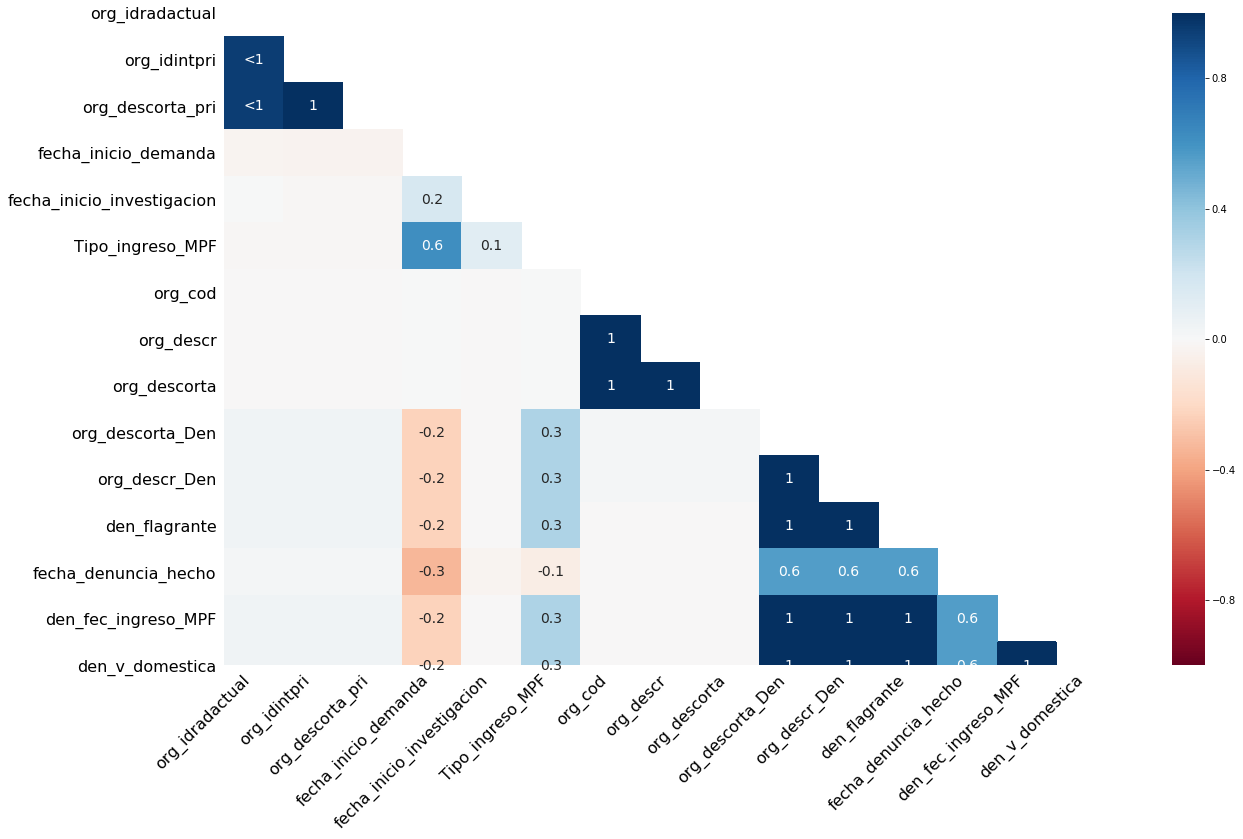

In [34]:
import missingno as msno
msno.heatmap(df)

In [35]:
df.drop(columns = ['PrimarioDen_id_oju','PrimarioExp_oju','PrimarioExp_id'], inplace = True)

In [45]:
df.exp_cuij.value_counts().head(10)

01-00046612-9    10
01-00014159-9     8
01-00049798-9     7
01-00049615-0     7
01-00043390-6     6
01-00036341-9     6
01-00059275-3     6
01-00014289-8     6
01-00043326-4     6
01-00018353-5     6
Name: exp_cuij, dtype: int64

In [44]:
df['codigo_expediente'] = df['exp_cuij'].str[:11]
df['codigo_expediente'].value_counts().head(10)

01-00046612    10
01-00014159     8
01-00049615     7
01-00049798     7
01-00014289     6
01-00059275     6
01-00036341     6
01-00056845     6
01-00043390     6
01-00047067     6
Name: codigo_expediente, dtype: int64

In [81]:
prueba = df[df.codigo_expediente == '01-00049615']
prueba.Tipo_ingreso_MPF

14655    DENUNCIA
14656    DENUNCIA
14657    DENUNCIA
14658    DENUNCIA
14659    DENUNCIA
14660    DENUNCIA
14661    DENUNCIA
Name: Tipo_ingreso_MPF, dtype: object

In [83]:
denuncia = df[df.Tipo_ingreso_MPF == 'DENUNCIA']
denuncia.org_idintseg.value_counts()

NaN     15578
1004      197
1006      197
1005      177
Name: org_idintseg, dtype: int64

In [84]:
df.org_idintseg.value_counts()

NaN     36096
1004      357
1006      356
1005      327
Name: org_idintseg, dtype: int64